# Exploratory Data Analysis on Global Terrorism




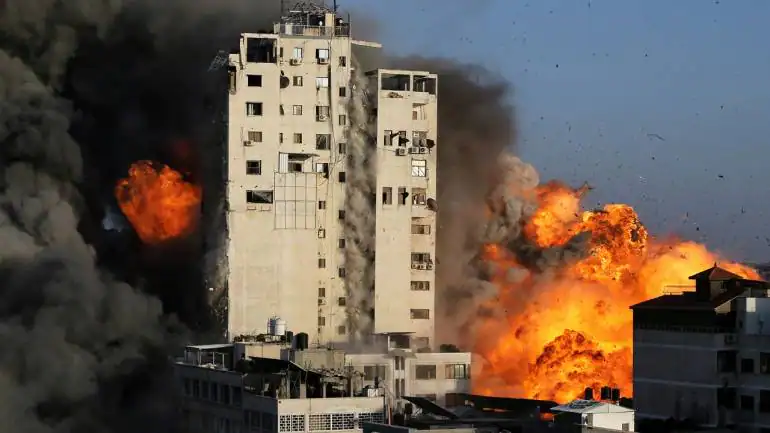

**Task**

1. As a security/defense analyst, try to find out the `Hot Zone` of terrorism.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA PREPROCESSING

In [ ]:
terrorism = pd.read_csv("/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv" , encoding='ISO-8859-1' , low_memory=False)

In [ ]:
terrorism.info()

* **There are 135 columns in the data.We have to look at the data carefully.And we will select only those colums which will be useful in our Analysis.**

In [ ]:
terrorism.shape

In [ ]:
pd.set_option('display.max_columns', 135)

In [ ]:
terrorism.head()

In [ ]:
 pd.options.display.max_rows = None

#### Rename some columns name which doesnt look right

In [ ]:
Map={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
       'attacktype1_txt':'AttackType', 'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}

terrorism.rename(Map , inplace = True , axis = 1)

In [ ]:
terrorism=terrorism[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type']]
terrorism.head()

#### There is missing rows in some columns. 

In [ ]:
terrorism.isnull().sum()

#### Remove these rows from the columns.

In [ ]:
terrorism.dropna(inplace=True , axis=0)

## Exploratory Data Analysis

In [ ]:
terrorism.groupby("Country")["Killed"].sum().sort_values(ascending = False).head(20)

##### Try to find out in which country maximum people have been killed.

In [ ]:
import plotly.express as px
top_killed_country = terrorism.groupby("Country")["Killed"].sum().sort_values(ascending = False).to_frame().reset_index().head(25)
px.bar(data_frame=top_killed_country,x = 'Country',y = 'Killed',color='Killed',template='plotly_dark')

**Iraq** , **Afghanistan** , **Pakistan** is the top three countries in which Most of the peoples have been killed due to terrorism.


### Check City wise

In [ ]:
top_killed_city = terrorism.groupby("City")["Killed"].sum().sort_values(ascending = False).to_frame().reset_index().head(25)
px.bar(data_frame=top_killed_city,x = 'City',y = 'Killed',color='Killed')

**Baghdad** is the city of `Iran` , **Mosul** is also the city of `Iran` and **Mogadishu** is the city of `Somalia`.These are top 3 cities in which peoples killed because of terrorism. 

### Trying to find out which group was committing terrorism in these Countries.

In [ ]:
terrorism[(terrorism["Country"] == 'Iran') | (terrorism["Country"] == 'Somalia')]["Group"].value_counts().head()

1. The group that is carrying out the most terrorism in **Somalia** is `AL- Shabaab` and `Mujahideen Youth Movement (MYM)` Group.



2. The group that is carrying out the most terrorism in **Iran** is `Mujahedin-e Khalq (MEK)` and `Arab Separatists` Group.


In [ ]:
top_year = terrorism["Year"].value_counts().sort_index()
top_year.plot.bar(figsize = (16,8),title = 'Number Of Terrorist Activities Each Year' , xlabel = 'Year' , ylabel = "Number of Attacks each year" , color = "brown")
plt.xticks(rotation = 65)
plt.show()

* The highest level of **terrorism** occurred in `2014 , 2015 , 2016`.

### Trying to find out which country witnessed the most terrorism in 2014 And which Weapon Type Mostly Used In these Countries?

In [ ]:
# replace vehicle variable.
terrorism = terrorism.replace("Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)" , "Vehicle")

weapon_type_used_in_2014 = terrorism[terrorism["Year"]==2014]["Weapon_type"].value_counts()
weapon_type_used_in_2014

* In 2014 the most `explosive material` was used to carry out terrorism

In [ ]:
most_effect_country_2014 = terrorism[terrorism["Year"]==2014]["Country"].value_counts().head(10)
most_effect_country_2014.plot.bar(figsize = (10,6) , title = ('Most Effected Countries IN 2014 Attacks') , xlabel = 'Country' , color = 'red')
plt.ylabel("No of Attacks")
plt.show()

`Iraq` , `Pakistan` , `Afghanistan` is the country most affected by the terrorist attack in 2014.


## Viusalize the 2014 Year terrorist Attack City Wise In the Geographical Map.

In [ ]:
import folium
from folium.plugins import MarkerCluster
year=terrorism[terrorism['Year']==2014]
mapData=year.loc[:,'City':'longitude']
mapData=mapData.dropna().values.tolist()

map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0, len(mapData)):
    folium.Marker(location=[mapData[i][1],mapData[i][2]],
                  popup = mapData[i][0]).add_to(markerCluster)
map

## Terrorist Activities Region Wise Each Year.

In [ ]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='area',figsize=(15,6) , 
                                                   title = ('Terrorist Activities by Region in each Year'))
plt.ylabel('Number of Attacks')
plt.show()


`Middle East and North Africa` and `South Asia` shows the highest terrorist attack in these Regions

In [ ]:
att_typ = terrorism["AttackType"].value_counts()
att_typ.plot.bar(figsize = (10,6) , title = "Attack_Types" , xlabel = 'Attack' , ylabel = 'No of Attack')

* Do some Feature Engineering.

In [ ]:
terrorism['Casualities'] = terrorism['Killed'] + terrorism['Wounded']
terrorism["Casualities"] = terrorism["Casualities"].astype(int)

## Top Casual Countries.

In [ ]:
terrorism.groupby("Country")["Casualities"].sum().sort_values(ascending = False).head(10)

In [ ]:
top_casual = terrorism.groupby("Country")["Casualities"].sum().to_frame().reset_index().sort_values("Casualities", ascending=False).head(25)
px.bar(data_frame=top_casual , x = "Country" , y = 'Casualities' ,color='Country',template='plotly_dark')

Again `Iraq` , `Pakistan` , `Afghanistan` is the country Who suffered the most casualities.


## Visualize top 40 Countries who faced most Casualities.

In [ ]:
terrorism1 = terrorism.sort_values("Casualities" , ascending = False).head(40)
heat = pd.pivot_table(terrorism1 , index = "Year" , columns = 'Country' , values = 'Casualities')

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

1. In **2001** `United States` Most people were killed about 9574 shown in above graph.
2. 1n **2014** , **2015** , **2016** `Iraq` Faced very difficult situations.Most people were killed in Iraq compare to other Countires.

## Top Terrorist Group

In [ ]:
top_terror_group = terrorism["Group"].value_counts()[1:11]
top_terror_group.plot.bar(figsize = (10,6) , title = "Terroirst Groups Who were committing terrorism" ,
                          ylabel = 'No of Attacks' , xlabel = 'Groups' , color = 'orange')
plt.show()

* The `Taliban` carried out more terrorism than any other terrorist group

### Mostly terrorist activites of taliban group are in these countries. `

In [ ]:
tlb_act = terrorism[terrorism["Group"]=="Taliban"]["Country"].value_counts()
tlb_act

### Geographically Visualize terrorist activites of taliban group city wise.

In [ ]:
import folium
from folium.plugins import MarkerCluster
year=terrorism[terrorism['Group']=='Taliban']
mapData=year.loc[:,'City':'longitude']
mapData=mapData.values.tolist()

map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0, len(mapData)):
    folium.Marker(location=[mapData[i][1],mapData[i][2]],
                  popup = mapData[i][0]).add_to(markerCluster)
map

### Geographically Visualize terrorist activites of top terrorist group city wise.

In [ ]:
terr_grp = terrorism["Group"].value_counts()[1:10].index.tolist()

In [ ]:
import folium
from folium.plugins import MarkerCluster
year=terrorism[terrorism['Group'].isin(terr_grp)]
mapData=year.loc[:,'City':'longitude']
mapData=mapData.values

map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0, len(mapData)):
    folium.Marker(location=[mapData[i][1],mapData[i][2]],
                  popup = mapData[i][0]).add_to(markerCluster)
map

## Conclusion.

* After analyzing this data We found out Middle East Countries like `Iran, Iraq, Afghanistan` and South Asia Countries like `Pakistan , india` Facing too much terrorism.


* Terrorist groups like **taliban** , **Islamic State of Iraq and the Levant (ISIL)** , **Shining Path (SL)** , **New People's Army (NPA)** , **Al-Shabaab** doing too much terrorism in these place and these place are the `Hot Zone` of the terrorist activites. 